In [7]:
%pip install matplotlib
%pip install sklearn
%pip install seaborn
%pip install --upgrade pip
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
       

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,classification_report

## Data Exploration

In [46]:
df_train= pd.read_csv(r"Titanic_train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### the features, their types, and summary statistics:

In [13]:
# summary statistics of the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# the data types of each column
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
print("Percentage of null values in Age:",(df_train['Age'].isnull().sum()/df_train.shape[0])*100)

Percentage of null values in Age: 19.865319865319865


In [20]:
print("Percentage of null values in Cabin:",(df_train['Cabin'].isnull().sum()/df_train.shape[0])*100)

Percentage of null values in Cabin: 77.10437710437711


So we gonna drop the column "Cabin" as it is having more than half of the rows as null.

In [43]:
# Duplicated values
df_train.duplicated().sum()

np.int64(0)

In [53]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Visualization

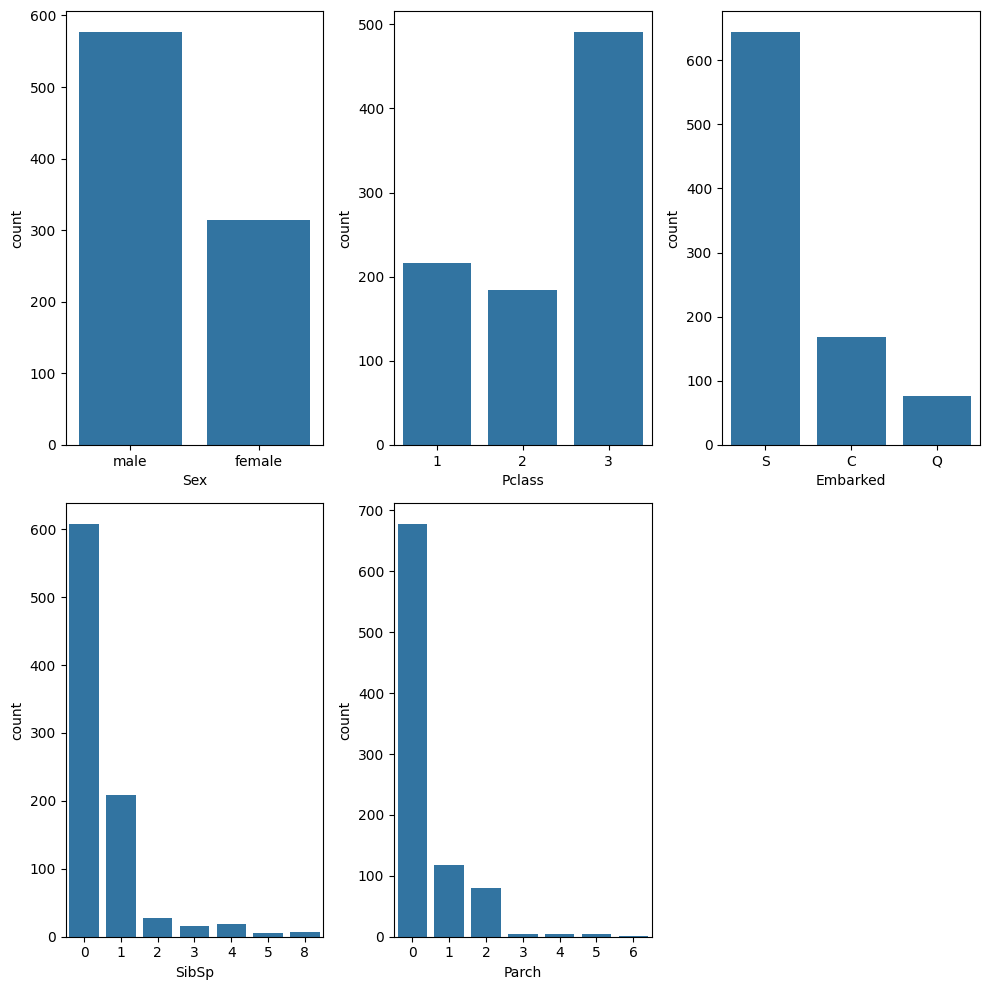

In [65]:
# survived count
cat_feat=df_train[['Sex','Pclass', 'Embarked','SibSp',
       'Parch']].columns
plt.figure(figsize=(10,10))
for i,col in enumerate(cat_feat,1):
    plt.subplot(2,3,i)
    sns.countplot(x=col,data=df_train)
    plt.tight_layout()
plt.show()

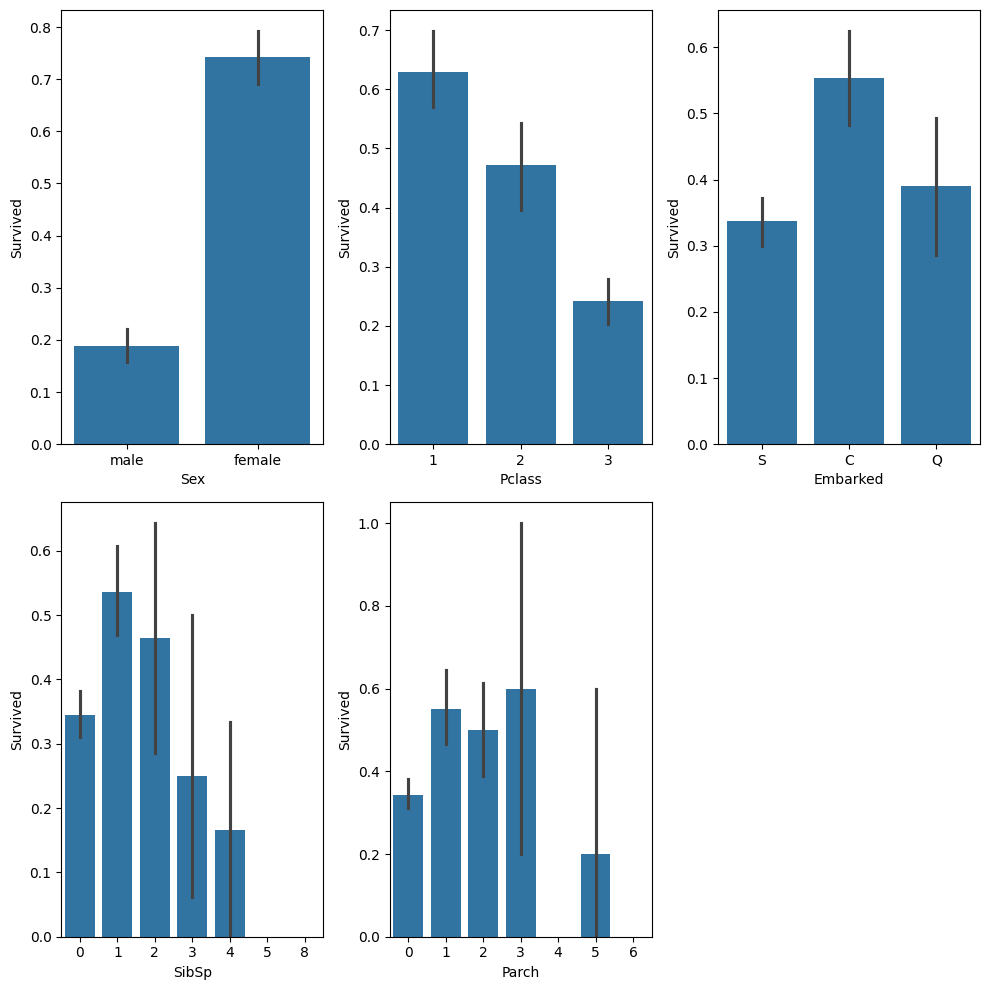

In [69]:
cat_feat=df_train[['Sex','Pclass', 'Embarked','SibSp',
       'Parch']].columns
plt.figure(figsize=(10,10))
for i,col in enumerate(cat_feat,1):
    plt.subplot(2,3,i)
    sns.barplot(x=col,y='Survived',data=df_train)
    plt.tight_layout()
plt.show()

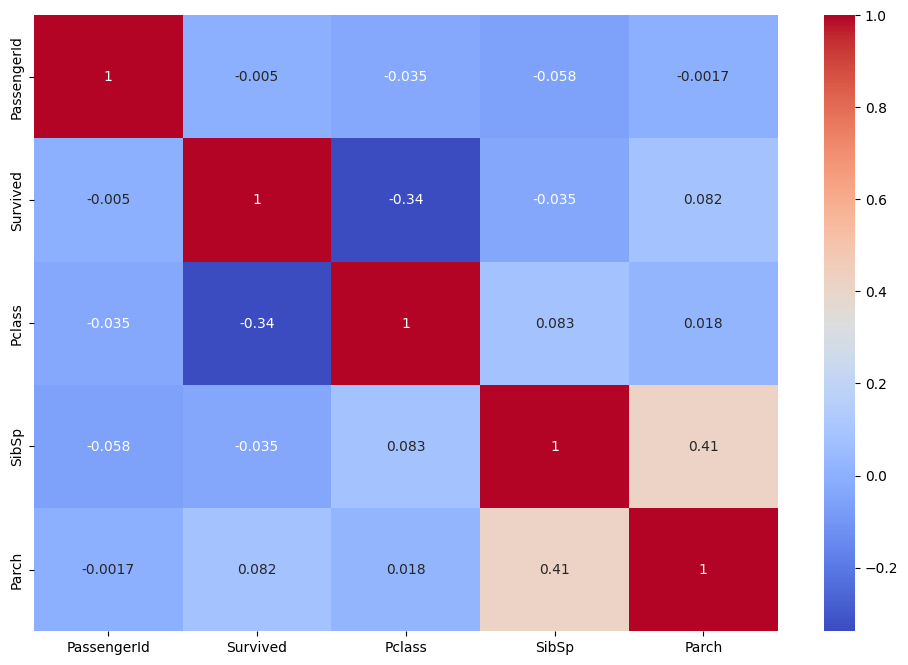

In [33]:
# Heatmap to visualize correlations
num_df=df_train.select_dtypes(include='int')
corr=num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

### Dealing with null values

In [70]:
from sklearn.impute import SimpleImputer

# Impute missing values in 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
df_train['Age'] = age_imputer.fit_transform(df_train[['Age']])

# Impute missing values in 'Embarked' with the most frequent value
df_train['Embarked'].fillna('mode')

# Drop 'Cabin' due to a high number of missing values
df_train = df_train.drop(columns=['Cabin'])

#### Encode categorical variables:

In [87]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [71]:
# Encode categorical variables using one-hot encoding
df=df_train.copy()
df = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)


## Feature selection

In [94]:
from sklearn.feature_selection import SelectKBest,chi2
X= df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y= df['Survived']

kbest=SelectKBest(score_func=chi2)
kbest.fit_transform(X,y)
kbest.scores_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


array([3.08736994e+01, 2.16491630e+01, 2.58186538e+00, 1.00974991e+01,
       4.51831909e+03, 9.27024470e+01, 1.08467891e-02, 5.98483982e+00])

In [92]:
feature_sel = pd.DataFrame(kbest.scores_, index=X.columns, columns=['Score'])
feature_sel.sort_values(by='Score',ascending=False)


,Score
Fare,4518.319091
Sex_male,92.702447
Pclass,30.873699
Age,21.649163
Parch,10.097499
Embarked_S,5.984840
SibSp,2.581865
Embarked_Q,0.010847


In [91]:
from sklearn.feature_selection import mutual_info_classif
importances= mutual_info_classif(X,y)
feat_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feat_importance_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
5,Sex_male,0.173262
4,Fare,0.128252
0,Pclass,0.049261
1,Age,0.024928
3,Parch,0.021093
7,Embarked_S,0.013186
2,SibSp,0.000000
6,Embarked_Q,0.000000


### Selecting features embarked, sibsp, parch as per the scores

# Model Building:

In [118]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId','Embarked_Q','Embarked_S','SibSp','Parch'])
y= df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Hyperparameter tuning:

In [112]:
from sklearn.model_selection import GridSearchCV

params={'max_iter':[500,800,1000,1500],'l1_ratio':[0.1,0.3],'penalty':['elasticnet'],'solver':['saga']}
cv=GridSearchCV(estimator=LogisticRegression(), param_grid=params,n_jobs=-1)
cv.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': [0.1, 0.3],
                         'max_iter': [100, 300, 500, 800, 1000, 1500],
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [113]:
cv.best_params_

{'l1_ratio': 0.1, 'max_iter': 1500, 'penalty': 'elasticnet', 'solver': 'saga'}

In [116]:
log_reg = LogisticRegression(max_iter=1500,l1_ratio=0.1)
log_reg.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(l1_ratio=0.1, max_iter=1500)

### Model Evaluation

In [117]:
# Predict on the test data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC score: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1-score: 0.7552447552447552
ROC AUC score: 0.875032175032175


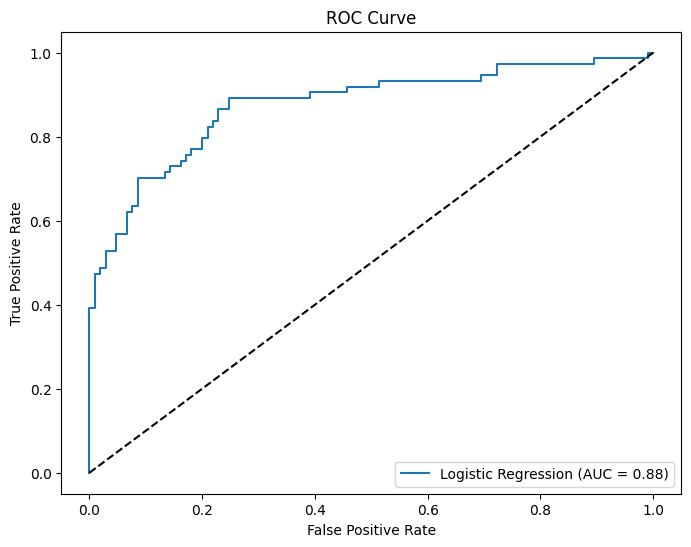

In [119]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Interpret the coefficients of the logistic regression model

In [120]:
# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
2      Fare     0.001183
1       Age    -0.025163
0    Pclass    -0.996326
3  Sex_male    -2.465606


Positive coefficients indicate that as the feature increases, the likelihood of survival increases. Negative coefficients indicate that as the feature increases, the likelihood of survival decreases. The magnitude of the coefficients indicates the strength of the association.  
For example 'Sex_male' has a large negative coefficient, it suggests that being male decreases the likelihood of survival compared to being female.  

In [121]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [97]:
import pickle

# Save the trained model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

Interview Questions:  
1. ####  What is the difference between precision and recal?  
Precision and recall are two important metrics used in the evaluation of classification models, particularly in the context of binary classification. Both metrics are derived from the confusion matrix, which consists of four components: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).  

Precision :  
Precision, also known as the positive predictive value, measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives).  

Precision =TP/(TP+FP)  

A high precision indicates that the model has a low false positive rate, meaning that when it predicts a positive class, it is usually correct.  

Recall :  
Recall, also known as sensitivity or the true positive rate, measures the ability of the model to correctly identify all relevant instances (i.e., all actual positives). It is the ratio of true positive predictions to the total number of actual positives (both true positives and false negatives).  

Recall= TP/(TP+FN)  
​
A high recall indicates that the model has a low false negative rate, meaning that it successfully identifies most of the actual positive cases.  

2. #### What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to assess the performance of a machine learning model. It involves partitioning the data into subsets, training the model on some subsets while testing it on the remaining subsets, and repeating this process multiple times. This approach helps ensure that the model's performance is consistent and not overly dependent on the particular division of the data into training and testing sets.  
Importance in Binary Classification:  
Reduces Overfitting    
Provides Robust Performance Estimates  
Helps in Model Selection and Hyperparameter Tuning  
Works Well with Limited Data  
Balances Bias and Variance  
?
